# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera



## Introduction: Business Problem <a name="introduction"></a>

Chennai is the capital of the Indian state of Tamil Nadu. Located on the Coromandel Coast of the Bay of Bengal, it is one of the largest cultural, economic and educational center of south India. It is the sixth-most populous city and fourth-most populous urban agglomeration in India. The city together with the adjoining regions constitutes the Chennai Metropolitan Area, which is the 36th-largest urban area by population in the world. 
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  

The rising number of cases has resulted in a deepening healthcare crisis that has gripped several states. India is reeling under a severe second wave of Covid-19 and many states are struggling to cope with the rising numbers. The second wave has hit a country which was unprepared. This has led to increased no. of cases where the hospitals are overcrowded and there is also shortage of oxygen supply in some areas. 

Business Problem: 
This project aims to analyze and solve the following problems
1.	List and visualize all the hospitals in and around the Chennai city
2.	Identify the neighborhoods around the hospitals
3.	What are all the best locations to open new public health centers
4.	Identify areas that lack hospital centers compared to other areas
5.	To alleviate over-crowding in hospitals and enhance the medical facilities to the citizens


## Data <a name="data"></a>

Chennai city's demographics show that it is a large and ethnically diverse metropolis. With its diverse society, comes diverse infrastructure. There are many different kinds of infrastructure in Chennai city, each belonging to different categories like hospitals, schools, colleges and apartments.
1.	Chennai Postal codes
<ol>
   <li>Data source: https://www.mapsofindia.com/pincode/india/tamil-nadu/chennai/
   <li>Description:
</ol>
This data contains list of major boroughs and their postal codes
2.	Geocoding API
<ol>
<li>	Data source:  https://developers.google.com/maps/documentation/geocoding/overview
<li>	Description:
The Geocoding API provides a direct way to access these services via an HTTP request. We leverage this API to obtain latitude and longitudes of hospitals
</ol>
3.	Hospital Location information
a.	Data source:
https://nationalinsurance.nic.co.in/sites/default/files/Chennai%20PPN%20List%20of%20Hospitals.pdf
4. Wikipedia:
<ol>
<li>https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai
<li>https://en.wikipedia.org/wiki/List_of_Chennai_Corporation_zones
    </ol>
5. Others:
<ol>
<li> https://www.census2011.co.in/census/metropolitan/435-chennai.html
<li> https://geoiq.io/
<ol>

### Section 1: Imports

In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time, json, math, random

import requests
import googlemaps

In [30]:
import configparser
config = configparser.ConfigParser()

config.read('../cred/config.cfg')

['../cred/config.cfg']

### Section 2 : Data acquisition

#### 2.1 Hospital Data

In [50]:
file_path = '../data_files/chennai_hospital_data_v5.csv'

chennai_hosp_data = pd.read_csv(file_path)

In [51]:
chennai_hosp_data.columns = ['No', 'HOSPITAL_NAME', 'AREA', 'CITY', 'STATE', 'PINCODE']

In [52]:
chennai_hosp_data.head()

,No,HOSPITAL_NAME,AREA,CITY,STATE,PINCODE
0,1,J.V. Hospitals L.L.P,Kodambakkam,Chennai,Tamilnadu,600024
1,2,Saraswathy Speciality Hospital,Madipakkam,Chennai,Tamilnadu,600091
2,3,Hindu Mission Hospital,Tambaram West,Chennai,Tamilnadu,600045
3,4,V H M Hospital (P) Ltd,Saligramam,Chennai,Tamilnadu,600093
4,5,Jaya Eye Care Hospital,Mandavelipakkam,Chennai,Tamilnadu,600028


In [10]:
chennai_hosp_data.shape

(227, 6)

In [53]:
# obtain latitude, longitude via google api
def get_coords(record):
    address = record.HOSPITAL_NAME + record.AREA + record.CITY, record.STATE, record.PINCODE
    gmaps = googlemaps.Client(key=config['GEOCODER']['KEY'])
    
    # Geocoding an address
    geocode_result = gmaps.geocode(address)
    
    if len(geocode_result) == 0:
        return ['', '']
    
    latitude = geocode_result[0]['geometry']['location'].get('lat', '')
    longitude = geocode_result[0]['geometry']['location'].get('lng', '')
    
    return [latitude, longitude]

In [54]:
%%time
coords_data = chennai_hosp_data.apply(get_coords, axis=1)

Wall time: 1min 54s


In [55]:
coords_df = pd.DataFrame(coords_data.to_list(), columns = ['Latitude', 'Longitude'])

In [57]:
chennai_hosp_data

,No,HOSPITAL_NAME,AREA,CITY,STATE,PINCODE
0,1,J.V. Hospitals L.L.P,Kodambakkam,Chennai,Tamilnadu,600024
1,2,Saraswathy Speciality Hospital,Madipakkam,Chennai,Tamilnadu,600091
2,3,Hindu Mission Hospital,Tambaram West,Chennai,Tamilnadu,600045
3,4,V H M Hospital (P) Ltd,Saligramam,Chennai,Tamilnadu,600093
4,5,Jaya Eye Care Hospital,Mandavelipakkam,Chennai,Tamilnadu,600028
...,...,...,...,...,...,...
222,223,Dr Agarwals Eye Hospital- Ambattur,Ambattur,Chennai,Tamilnadu,600053
223,224,TAGORE MEDICAL COLLEGE AND HOSPITAL,Rathinamangalam,Chennai,Tamilnadu,600127
224,225,VSMART HEALTH VENTURES PRIVATE LIMITED,Adyar,Chennai,Tamilnadu,600020
225,226,DR. MOHAN'S DIABETES SPECIALITIES CENTRE PVT. ...,Gopalapuram,Chennai,Tamilnadu,600086


In [58]:
hosp_coords_df = pd.concat([chennai_hosp_data, coords_df], axis=1)

In [60]:
#hosp_coords_df.to_csv('../data_files/hosp_coords_df.csv', index=False)

In [61]:
hosp_coords_df

,No,HOSPITAL_NAME,AREA,CITY,STATE,PINCODE,Latitude,Longitude
0,1,J.V. Hospitals L.L.P,Kodambakkam,Chennai,Tamilnadu,600024,13.050624,80.229932
1,2,Saraswathy Speciality Hospital,Madipakkam,Chennai,Tamilnadu,600091,12.965450,80.206727
2,3,Hindu Mission Hospital,Tambaram West,Chennai,Tamilnadu,600045,12.924041,80.113904
3,4,V H M Hospital (P) Ltd,Saligramam,Chennai,Tamilnadu,600093,13.046310,80.197985
4,5,Jaya Eye Care Hospital,Mandavelipakkam,Chennai,Tamilnadu,600028,13.026573,80.269928
...,...,...,...,...,...,...,...,...
222,223,Dr Agarwals Eye Hospital- Ambattur,Ambattur,Chennai,Tamilnadu,600053,13.122041,80.147437
223,224,TAGORE MEDICAL COLLEGE AND HOSPITAL,Rathinamangalam,Chennai,Tamilnadu,600127,12.861220,80.136353
224,225,VSMART HEALTH VENTURES PRIVATE LIMITED,Adyar,Chennai,Tamilnadu,600020,12.999724,80.253384
225,226,DR. MOHAN'S DIABETES SPECIALITIES CENTRE PVT. ...,Gopalapuram,Chennai,Tamilnadu,600086,13.053856,80.257725


### 2.2 Chennai Neighborhoods

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai"
html_data = requests.get(url).text

In [3]:
soup = BeautifulSoup(html_data, 'html5lib')

In [4]:
type(soup)

bs4.BeautifulSoup

In [16]:
chennai_neightborhood = pd.read_html(url, flavor='bs4')[1]

In [18]:
#chennai_neightborhood.to_csv('../data_files/chennai_neighborhoods.csv', index=False)

In [34]:
chennai_neighborhood = pd.read_csv('../data_files/zone_neigh_pop_v3.csv')

In [35]:
chennai_neighborhood

,Zone_No,Zone,Neighbourhood,Latitude,Longitude,Population,Male,Female,Children,Population_Density
0,1,Thiruvottiyur,Ennore,13.21460,80.32030,82686,41617,41069,8002,3146
1,1,Thiruvottiyur,Kathivakkam,13.20460,80.31674,82686,41617,41069,8002,3146
2,1,Thiruvottiyur,Tiruvottiyur,13.16430,80.30010,82686,41617,41069,8002,3146
3,2,Manali,Manali,13.17790,80.27010,27266,13863,13403,3115,2787
4,2,Manali,Manali New Town,13.19330,80.27080,27266,13863,13403,3115,2787
...,...,...,...,...,...,...,...,...,...,...
171,16,Outer city,Kanathur,12.86630,80.24470,6513,3346,3165,652,314
172,16,Outer city,Muthukadu,12.82700,80.24030,6513,3346,3165,652,314
173,16,Outer city,Kelambakkam,13.06042,80.24958,6513,3346,3165,652,314
174,16,Outer city,Kovalam,12.78700,80.25040,6513,3346,3165,652,314


### 2.3 Visualize neighborhoods with Folium

In [107]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

In [9]:
#ccordinates of Chennai city

latitude = 13.0827
longitude = 80.2707

In [13]:
# create map of Chennai using latitude and longitude values
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=10)
label = folium.Popup("Chennai", parse_html=True)
folium.CircleMarker(
    [latitude, longitude],
    radius=20,
    popup=label,
    color='red',
    fill=True,
    fill_color='#cc3139',
    fill_opacity=0.7,
    parse_html=False).add_to(map_chennai)  

# add markers to map
for lat, lng, borough, neighborhood in zip(chennai_neighborhood['Latitude'], chennai_neighborhood['Longitude'], chennai_neighborhood['Zone'], chennai_neighborhood['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
    
map_chennai

<h3>Displaying the folium image</h3>

<img src='../data_files/chennai_neighborhoods_viz.png'>

### 2.4 Visualize hospitals with folium

In [3]:
chennai_hospital_data = pd.read_csv('../data_files/hosp_coords_df.csv')

In [17]:
chennai_hospital_data.shape

(227, 8)

In [18]:
chennai_hospital_data.columns

Index(['No', 'HOSPITAL_NAME', 'AREA', 'CITY', 'STATE', 'PINCODE', 'Latitude',
       'Longitude'],
      dtype='object')

In [20]:
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=10)
label = folium.Popup("Chennai", parse_html=True)
folium.CircleMarker(
    [latitude, longitude],
    radius=20,
    popup=label,
    color='red',
    fill=True,
    fill_color='#cc3139',
    fill_opacity=0.7,
    parse_html=False).add_to(map_chennai)  

# add markers to map
for lat, lng, borough, neighborhood in zip(chennai_hospital_data['Latitude'], chennai_hospital_data['Longitude'], chennai_hospital_data['HOSPITAL_NAME'], chennai_hospital_data['AREA']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
    
map_chennai

<h3>Displaying the hospital vizualizations in folium image</h3>

<img src='../data_files/chennai_hospital_viz.PNG'>

### 2.5 Visualize hospitals & neighborhoods with folium

In [25]:
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood in zip(chennai_neighborhood['Latitude'], chennai_neighborhood['Longitude'], chennai_neighborhood['Zone'], chennai_neighborhood['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='#3186cc',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_chennai)  

# add markers to map
for lat, lng, borough, neighborhood in zip(chennai_hospital_data['Latitude'], chennai_hospital_data['Longitude'], chennai_hospital_data['HOSPITAL_NAME'], chennai_hospital_data['AREA']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
    
map_chennai

<h3>Displaying both the hospital and neighborhood vizualizations in folium image</h3>

<img src='../data_files/chennai_hosp_neigh_viz.PNG'>

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on venues in each neighborhood.

We're interested in venues in each category, Initially we shall get all the venue categories. LAter we'll group these venue categories

### 2.6 Explore venues of very first neighborhood with Foursquare

In [31]:

from pandas.io.json import json_normalize

In [32]:
CLIENT_ID = config['FOURSQUARE']['CLIENT_ID']
CLIENT_SECRET = config['FOURSQUARE']['CLIENT_SECRET']

In [33]:
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [36]:
chennai_neighborhood.loc[0, 'Neighbourhood']

'Ennore'

In [39]:
neighborhood_latitude = chennai_neighborhood.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = chennai_neighborhood.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = chennai_neighborhood.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Ennore are 13.2146, 80.3203.


In [40]:
radius = 5000

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '609935086ee0484948ba7d42'},
 'response': {'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': 13.259600045000045,
    'lng': 80.36643772006659},
   'sw': {'lat': 13.169599954999956, 'lng': 80.27416227993342}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c31b230213c2d7fca4a345d',
       'name': 'Ennore Rail Station',
       'location': {'address': 'Ennore',
        'lat': 13.217603402125905,
        'lng': 80.32147407531738,
        'labeledLatLngs': [{'label': 'display',
          'lat': 13.217603402125905,
          'lng': 80.32147407531738}],
        'distance': 357,
        'cc': 'IN',
        'city'

In [41]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [42]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\abilash\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Ennore Rail Station,Train Station,13.217603,80.321474
1,Ennore MRTS Station,Train Station,13.218055,80.321732
2,Athipattu Pudhunagar,Train Station,13.219301,80.321602
3,Katthivakam,Train Station,13.203903,80.315759
4,Ennore,Train Station,13.187732,80.307597


In [43]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

7 venues were returned by Foursquare.


### 2.7 Explore venues for all the neighborhoods in Chennai

In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
# type your answer here

chennai_venues = getNearbyVenues(chennai_neighborhood['Neighbourhood'], chennai_neighborhood['Latitude'], 
                chennai_neighborhood['Longitude'], radius=5000)

Ennore
Kathivakkam
Tiruvottiyur
Manali
Manali New Town
Mathur MMDA
Kathirvedu
Madhavaram
Madhavaram Milk Colony
Manjambakkam
Naravarikuppam
Puzhal
Selavoyal
Surapet
Basin Bridge
Chetpet
Erukanchery
Jamalia
Kodungaiyur
Korukkupet
M.K.B. Nagar
Moolakadai
Perambur
Tondiarpet
Vyasarpadi
Broadway
Central
Egmore
George Town
Mannadi
New Washermenpet
Old Washermenpet
Park Town
Parry's Corner
Periamet
Royapuram
Sowcarpet
Choolai
Kolathur
Lakshmipuram
Pattalam
Ponniammanmedu
Pulianthope
Sembiam
T.V.K. Nagar
Ambattur
Kallikuppam
Korattur
Mogappair
Pattravakkam
Pudur
Red Hills
Thiruverkadu
Aminjikarai
Anna Nagar
Arumbakkam
MMDA Colony
ICF Colony
K.K. Nagar
Kosapet
Koyambedu
Purasawalkam
Thirumangalam
Vepery
Villivakkam
Gopalapuram
Mylapore
Teynampet
Thousand Lights
Triplicane
Alwarthirunagar
Ashok Nagar
Defence Colony
M.G.R. Garden
M.G.R. Nagar
Saidapet
Saligramam
T. Nagar
Vadapalani
Virugambakkam
West Mambalam
Alapakkam
Karambakkam
Maduravoyal
Mangadu
Nerkundrum
Nesapakkam
Nolambur
Porur
Ramapura

In [48]:
chennai_venues.to_csv('../data_files/chennai_venues_v6.csv', index=False)
chennai_venues = pd.read_csv('../data_files/chennai_venues_v6.csv')

In [5]:
chennai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ennore,13.2146,80.32030,Ennore Rail Station,13.217603,80.321474,Train Station
1,Ennore,13.2146,80.32030,Axis Bank ATM,13.218136,80.320086,ATM
2,Ennore,13.2146,80.32030,Ennore MRTS Station,13.218055,80.321732,Train Station
3,Kathivakkam,13.2046,80.31674,Katthivakam,13.203903,80.315759,Train Station
4,Tiruvottiyur,13.1643,80.30010,Abinayam Textiles,13.163988,80.303387,Clothing Store


In [49]:
chennai_venues.shape

(9533, 7)

In [50]:
chennai_venues.groupby('Neighborhood').size()

Neighborhood
Adambakkam         100
Adyar              100
Alandur            100
Alapakkam           83
Alwarthirunagar    100
                  ... 
Villivakkam        100
Virugambakkam      100
Vyasarpadi          34
West Mambalam      100
manapakkam         100
Length: 170, dtype: int64

In [51]:
print('There are {} uniques categories.'.format(len(chennai_venues['Venue Category'].unique())))

There are 174 uniques categories.


### Modify hospital and zone data to hospital_venues

In [76]:
hosp_venues = []
for pincode in zone_neigh_final_df.pincode.unique():
    for index, row in zone_neigh_final_df.loc[zone_neigh_final_df['pincode']==pincode].iterrows():
        if len(row) ==0:
            continue
        for index, hosp_record in hosp_data.loc[hosp_data['PINCODE']==pincode].iterrows():
            if len(hosp_record) == 0:
                continue
            hosp_venues.append([row.Zone, row.Latitude, row.Longitude, 
                               hosp_record.HOSPITAL_NAME, hosp_record.Venue_Latitude, hosp_record.Venue_Longitude, "Hospital"])

In [77]:
hosp_venues = pd.DataFrame(hosp_venues, columns = chennai_venues.columns)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Thiruvottiyur,13.21460,80.32030,Vasan Eye Care Hospital (Saidapet),13.022031,80.225751,Hospital
1,Thiruvottiyur,13.20460,80.31674,Vasan Eye Care Hospital (Saidapet),13.022031,80.225751,Hospital
2,Outer city,13.21460,80.32030,Vasan Eye Care Hospital (Saidapet),13.022031,80.225751,Hospital
3,Thiruvottiyur,13.16430,80.30010,Aakash Hospital,13.169481,80.304399,Hospital
4,Thiruvottiyur,13.16430,80.30010,Sugam Hospital,13.165001,80.303401,Hospital
...,...,...,...,...,...,...,...
347,Outer city,13.09650,80.18450,RPS HOSPITALS PVT LTD,13.120830,80.197837,Hospital
348,Outer city,12.96750,80.14910,SHADITHYA HEALTH CARE,12.971798,80.144532,Hospital
349,Outer city,13.13070,80.13140,Be Well Hospitals,13.126143,80.140830,Hospital
350,Outer city,13.13183,80.13082,Be Well Hospitals,13.126143,80.140830,Hospital


In [52]:
hospital_venues = pd.read_csv('../data_files/hospital_venues.csv')

In [53]:
hospital_venues.shape

(352, 7)

In [54]:
total_chennai_venues = pd.concat([chennai_venues, hospital_venues])

In [61]:
total_chennai_venues.shape

(9885, 7)

In [62]:
total_chennai_venues = pd.read_csv('../data_files/tot_chennai_venues_v6.csv')

## 3. Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Chennai that have low hospital density, particularly those with those with a lot of venues. We will limit our analysis to area ~5km around each neighborhood.

In first step we have collected the required **data: location and type (category) of every hospital and venue within 5km from each neighborhood center** We have obtained the hospital data separately along with the latitudes and longitudes

The next step is we group the venues based on their categories: Services, Sports, entertainment, Hospital and others

We one hot encode the venue categories. We identify their total in each neighborhood. The venue categories are put in to the group/bins specified above. Then we compute, no.of venue groups per hospital in a given neighborhood.

We use this information to identify areas with least hospitals via clustering

### One hot the venue categories

In [64]:
chennai_onehot = pd.get_dummies(total_chennai_venues[['Venue Category']], prefix="", prefix_sep="")

In [65]:
chennai_onehot['Neighborhood'] = total_chennai_venues['Neighborhood'] 

In [66]:
fixed_columns = [chennai_onehot.columns[-1]] + list(chennai_onehot.columns[:-1])
chennai_onehot = chennai_onehot[fixed_columns]

chennai_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,...,Theme Park,Toll Booth,Train Station,Vegetarian / Vegan Restaurant,Video Store,Water Park,Whisky Bar,Women's Store,Zoo,Zoo Exhibit
0,Ennore,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Ennore,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Ennore,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Ennore,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Ennore,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [93]:
chennai_grouped = chennai_onehot.groupby('Neighborhood').sum().reset_index()
chennai_grouped

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,...,Theme Park,Toll Booth,Train Station,Vegetarian / Vegan Restaurant,Video Store,Water Park,Whisky Bar,Women's Store,Zoo,Zoo Exhibit
0,Adambakkam,0,1,0,0,0,0,0,0,0,...,0,0,1,4,0,0,1,1,0,0
1,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,1,0,0
2,Alandur,0,1,0,0,0,0,0,0,0,...,0,0,1,4,0,0,1,1,0,0
3,Alapakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
4,Alwarthirunagar,0,0,0,0,0,0,0,0,0,...,0,0,1,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Villivakkam,0,0,0,0,0,0,0,1,0,...,0,0,1,3,0,0,0,0,0,0
170,Virugambakkam,0,0,0,0,0,0,0,1,0,...,0,0,0,4,0,0,0,0,0,0
171,Vyasarpadi,0,0,0,0,0,0,0,0,0,...,0,0,3,1,1,0,0,0,0,0
172,West Mambalam,0,0,0,1,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0


In [80]:
grouped_cols = pd.DataFrame([[l] for l in chennai_grouped.columns.to_list()], columns=['Venue Category'])

In [81]:
grouped_cols.to_csv('../data_files/grouped_cols.csv', index=False)

In [82]:
grouped_cols

,Venue Category
0,Neighborhood
1,ATM
2,Accessories Store
3,Afghan Restaurant
4,African Restaurant
...,...
170,Water Park
171,Whisky Bar
172,Women's Store
173,Zoo


In [83]:
grouped_cols_category = pd.read_csv('../data_files/grouped_cols_category.csv')

In [84]:
grouped_cols_category

,Venue Category,Category
0,Neighborhood,Other
1,ATM,Amenities
2,Accessories Store,Amenities
3,Afghan Restaurant,Restaurant
4,African Restaurant,Restaurant
...,...,...
170,Water Park,Entertainment
171,Whisky Bar,Restaurant
172,Women's Store,Services
173,Zoo,Entertainment


In [95]:
for category in grouped_cols_category.Category.unique():
    curr_list = grouped_cols_category.loc[grouped_cols_category.Category == category]['Venue Category'].tolist()
    
    chennai_grouped[category] = chennai_grouped[curr_list].sum(axis=1)

In [96]:
for category in grouped_cols_category[grouped_cols_category.Category != 'Hospital'].Category.unique():
    chennai_grouped[category] = chennai_grouped[category] / (chennai_grouped['Hospital'] + 1)

In [97]:
chennai_grouped

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,...,Whisky Bar,Women's Store,Zoo,Zoo Exhibit,Other,Amenities,Transport,Entertainment,Sports,Services
0,Adambakkam,0,1,0,0,0,0,0,0,0,...,1,1,0,0,2.000000,3.000000,1.00,7.000000,0.0,7.000000
1,Adyar,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.454545,0.272727,0.00,0.363636,0.0,0.318182
2,Alandur,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0.200000,0.120000,0.04,0.280000,0.0,0.240000
3,Alapakkam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.500000,2.500000,0.00,2.500000,0.0,2.500000
4,Alwarthirunagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.000000,1.500000,0.50,3.000000,0.0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Villivakkam,0,0,0,0,0,0,0,1,0,...,0,0,0,0,7.000000,9.000000,3.00,6.000000,0.0,3.000000
170,Virugambakkam,0,0,0,0,0,0,0,1,0,...,0,0,0,0,11.000000,5.000000,0.00,5.000000,0.0,5.000000
171,Vyasarpadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,4.000000,3.00,4.000000,2.0,0.000000
172,West Mambalam,0,0,0,1,0,0,0,0,0,...,0,0,0,0,4.000000,3.000000,0.00,7.000000,0.0,6.000000


In [102]:
chennai_summary_cols = ['Neighborhood'] + grouped_cols_category.Category.unique().tolist() 

In [104]:
chennai_summary_df = chennai_grouped[chennai_summary_cols]

In [105]:
chennai_summary_df.head()

,Neighborhood,Other,Amenities,Restaurant,Transport,Entertainment,Sports,Services,Hospital
0,Adambakkam,2.000000,3.000000,80.000000,1.00,7.000000,0.0,7.000000,0
1,Adyar,0.454545,0.272727,3.136364,0.00,0.363636,0.0,0.318182,21
2,Alandur,0.200000,0.120000,3.120000,0.04,0.280000,0.0,0.240000,24
3,Alapakkam,0.500000,2.500000,33.000000,0.00,2.500000,0.0,2.500000,1
4,Alwarthirunagar,2.000000,1.500000,40.000000,0.50,3.000000,0.0,2.500000,1


In [106]:
chennai_summary_df.shape

(174, 9)

### Visualize with folium

In [110]:
zone_neigh_df = pd.read_csv("../data_files/zone_neigh_pop_v4.csv")

In [111]:
chennai_zone_summary = pd.merge(zone_neigh_df, chennai_summary_df, left_on = 'Neighbourhood', right_on = 'Neighborhood', how='inner')

In [112]:
chennai_zone_summary.shape

(176, 20)

In [113]:
chennai_zone_summary.head(5)

,Zone_No,Zone,Neighbourhood,Latitude,Longitude,Population,Male,Female,Children,Population_Density,pincode,Neighborhood,Other,Amenities,Restaurant,Transport,Entertainment,Sports,Services,Hospital
0,1,Thiruvottiyur,Ennore,13.2146,80.32030,82686,41617,41069,8002,3146,600057,Ennore,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0
1,16,Outer city,Ennore,13.2146,80.32030,6513,3346,3165,652,314,600057,Ennore,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0
2,1,Thiruvottiyur,Kathivakkam,13.2046,80.31674,82686,41617,41069,8002,3146,600057,Kathivakkam,2.0,0.0,1.0,6.0,0.0,0.0,1.0,0
3,1,Thiruvottiyur,Tiruvottiyur,13.1643,80.30010,82686,41617,41069,8002,3146,600019,Tiruvottiyur,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0
4,2,Manali,Manali,13.1779,80.27010,27266,13863,13403,3115,2787,600068,Manali,0.0,0.5,1.5,0.0,0.0,0.0,0.5,1


In [114]:
#ccordinates of Chennai city

latitude = 13.0827
longitude = 80.2707

In [115]:
# create map of Chennai using latitude and longitude values
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=10)
label = folium.Popup("Chennai", parse_html=True)
folium.CircleMarker(
    [latitude, longitude],
    radius=2,
    popup=label,
    color='red',
    fill=True,
    fill_color='#cc3139',
    fill_opacity=0.7,
    parse_html=False).add_to(map_chennai)  

# add markers to map
for lat, lng, borough, neighborhood, total_hospital in zip(chennai_zone_summary['Latitude'], chennai_zone_summary['Longitude'], chennai_zone_summary['Zone'], chennai_zone_summary['Neighbourhood'], chennai_zone_summary['Hospital']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=total_hospital+1,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
    
map_chennai

<h3>Displaying no.of hospitals in each neighborhood vizualizations in folium image</h3>

<img src='../data_files/chennai_hosp_per_neigh.PNG'>

## Clustering

In [116]:
chennai_zone_summary.head(5)

,Zone_No,Zone,Neighbourhood,Latitude,Longitude,Population,Male,Female,Children,Population_Density,pincode,Neighborhood,Other,Amenities,Restaurant,Transport,Entertainment,Sports,Services,Hospital
0,1,Thiruvottiyur,Ennore,13.2146,80.32030,82686,41617,41069,8002,3146,600057,Ennore,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0
1,16,Outer city,Ennore,13.2146,80.32030,6513,3346,3165,652,314,600057,Ennore,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0
2,1,Thiruvottiyur,Kathivakkam,13.2046,80.31674,82686,41617,41069,8002,3146,600057,Kathivakkam,2.0,0.0,1.0,6.0,0.0,0.0,1.0,0
3,1,Thiruvottiyur,Tiruvottiyur,13.1643,80.30010,82686,41617,41069,8002,3146,600019,Tiruvottiyur,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0
4,2,Manali,Manali,13.1779,80.27010,27266,13863,13403,3115,2787,600068,Manali,0.0,0.5,1.5,0.0,0.0,0.0,0.5,1


In [118]:
chennai_zone_summary.columns

Index(['Zone_No', 'Zone', 'Neighbourhood', 'Latitude', 'Longitude',
       'Population', 'Male', 'Female', 'Children', 'Population_Density',
       'pincode', 'Neighborhood', 'Other', 'Amenities', 'Restaurant',
       'Transport', 'Entertainment', 'Sports', 'Services', 'Hospital'],
      dtype='object')

In [119]:
chennai_zone_cols = [ 'Population', 'Male', 'Female', 'Children', 'Population_Density', 'Other', 'Amenities', 'Restaurant',
       'Transport', 'Entertainment', 'Sports', 'Services', 'Hospital']

In [151]:
chennai_zone_cols = [ 'Other', 'Amenities', 'Restaurant',
       'Transport', 'Entertainment', 'Sports', 'Services', 'Hospital']

In [152]:
chennai_zone_summary[chennai_zone_cols]

,Other,Amenities,Restaurant,Transport,Entertainment,Sports,Services,Hospital
0,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0
1,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0
2,2.0,0.0,1.0,6.0,0.0,0.0,1.0,0
3,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0
4,0.0,0.5,1.5,0.0,0.0,0.0,0.5,1
...,...,...,...,...,...,...,...,...
171,4.0,1.0,39.0,0.0,6.0,1.0,1.0,0
172,5.0,3.0,36.0,0.0,6.0,2.0,1.0,0
173,6.0,3.0,72.0,0.0,11.0,1.0,7.0,0
174,3.0,0.0,19.0,0.0,3.0,1.0,0.0,0


In [121]:
from sklearn.cluster import KMeans

In [124]:
## trial with 5 clusters

kclusters = 5

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chennai_zone_summary[chennai_zone_cols])


In [125]:
kmeans.labels_[0:10] 

array([2, 3, 2, 2, 0, 0, 0, 3, 3, 3])

In [153]:
distortions = []
n_clusters = range(5,20)
for k in n_clusters:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(chennai_zone_summary[chennai_zone_cols])
    distortions.append(kmeanModel.inertia_)

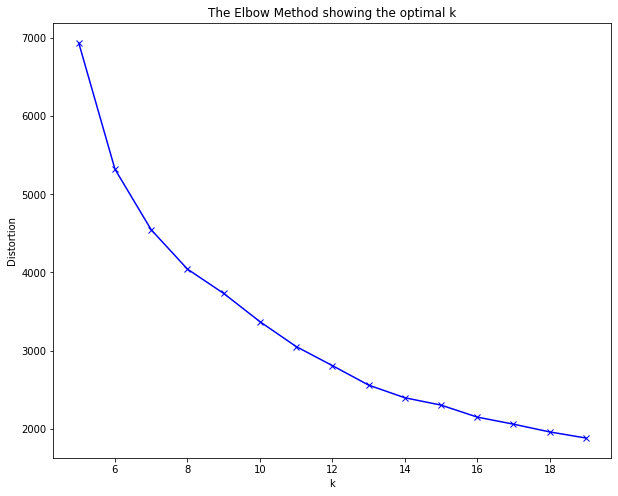

In [154]:
plt.figure(figsize=(10,8))
plt.plot(n_clusters, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [130]:
# 10 seems to be good clustering range

In [160]:
kclusters = 10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chennai_zone_summary[chennai_zone_cols])

kmeans.labels_[0:10] 

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [161]:
chennai_zone_summary['Cluster'] = kmeans.labels_

In [ ]:
cluster_color_codes = ['blue', 'green', 'yellow', 'red', 'magenta', 'brown', 'white', 'black', 'orange', 'cyan']
color_codes = ['#fff100', '#ff8c00', '#e81123', '#ec008c', '#68217a', '#00188f', '#00bcf2', '#00b294', '#009e49', '#bad80a']

In [135]:
sns.color_palette("husl", 10)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775)]

## Visualize neighborhoods based on cluster

In [162]:
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=10)
label = folium.Popup("Chennai", parse_html=True)
folium.CircleMarker(
    [latitude, longitude],
    radius=2,
    popup=label,
    color='red',
    fill=True,
    fill_color='#cc3139',
    fill_opacity=0.7,
    parse_html=False).add_to(map_chennai)  

# add markers to map
for lat, lng, borough, neighborhood, total_hospital, cluster in zip(chennai_zone_summary['Latitude'], chennai_zone_summary['Longitude'], chennai_zone_summary['Zone'], chennai_zone_summary['Neighbourhood'], chennai_zone_summary['Hospital'], chennai_zone_summary['Cluster']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=cluster_color_codes[cluster],
        fill=True,
        fill_color=cluster_color_codes[cluster],
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
    
map_chennai

## Visualize based on cluster & Hospitals

In [163]:
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=10)
label = folium.Popup("Chennai", parse_html=True)
folium.CircleMarker(
    [latitude, longitude],
    radius=2,
    popup=label,
    color='red',
    fill=True,
    fill_color='#cc3139',
    fill_opacity=0.7,
    parse_html=False).add_to(map_chennai)  

# add markers to map
for lat, lng, borough, neighborhood, total_hospital, cluster in zip(chennai_zone_summary['Latitude'], chennai_zone_summary['Longitude'], chennai_zone_summary['Zone'], chennai_zone_summary['Neighbourhood'], chennai_zone_summary['Hospital'], chennai_zone_summary['Cluster']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=total_hospital,
        popup=label,
        color=cluster_color_codes[cluster],
        fill=True,
        fill_color=cluster_color_codes[cluster],
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
    
map_chennai

<h3>Displaying hospitals & cluster neighborhood vizualizations in folium image</h3>

<img src='../data_files/chennai_clust_hosp.PNG'>

## Discussion

Let us explore each cluster

Cluster 0: 
   * North Chennai Region with very no big hospitals
   * More restaurants
    

In [170]:
chennai_zone_summary[chennai_zone_summary['Cluster']==0]

,Zone_No,Zone,Neighbourhood,Latitude,Longitude,Population,Male,Female,Children,Population_Density,...,Neighborhood,Other,Amenities,Restaurant,Transport,Entertainment,Sports,Services,Hospital,Cluster
15,4,Tondiarpet,Basin Bridge,13.10140,80.27040,25559,13314,12245,2369,1674,...,Basin Bridge,3.0,6.0,75.0,0.0,11.0,2.0,3.0,0,0
16,4,Tondiarpet,Chetpet,13.07140,80.24170,25559,13314,12245,2369,1674,...,Chetpet,6.0,4.0,72.0,0.0,11.0,1.0,6.0,0,0
28,5,Royapuram,Egmore,13.07320,80.26090,22160,11541,10618,2054,1134,...,Egmore,6.0,2.0,74.0,0.0,12.0,1.0,5.0,0,0
29,5,Royapuram,George Town,13.09690,80.28650,22160,11541,10618,2054,1134,...,George Town,3.0,7.0,68.0,2.0,9.0,3.0,2.0,0,0
30,5,Royapuram,Mannadi,13.09280,80.28930,22160,11541,10618,2054,1134,...,Mannadi,3.0,7.0,72.0,1.0,9.0,3.0,2.0,0,0
34,5,Royapuram,Parry's Corner,13.08960,80.28820,22160,11541,10618,2054,1134,...,Parry's Corner,4.0,6.0,73.0,1.0,11.0,3.0,2.0,0,0
35,5,Royapuram,Periamet,13.08290,80.26600,22160,11541,10618,2054,1134,...,Periamet,6.0,5.0,70.0,1.0,13.0,2.0,3.0,0,0
37,5,Royapuram,Sowcarpet,13.09870,80.27850,22160,11541,10618,2054,1134,...,Sowcarpet,3.0,7.0,74.0,1.0,10.0,3.0,2.0,0,0
41,6,Thiru. Vi. Ka. Nagar,Pattalam,13.09739,80.25929,24367,12460,11782,2310,1386,...,Pattalam,3.0,5.0,71.0,2.0,13.0,2.0,4.0,0,0
44,6,Thiru. Vi. Ka. Nagar,Sembiam,13.11528,80.23390,24367,12460,11782,2310,1386,...,Sembiam,5.0,10.0,70.0,3.0,3.0,0.0,2.0,0,0


Cluster 1: 
   * Some North Chennai Region and mostly outer city with no very big hospitals
   * fewer restaurants
    

In [167]:
## region with
chennai_zone_summary[chennai_zone_summary['Cluster']==1]

,Zone_No,Zone,Neighbourhood,Latitude,Longitude,Population,Male,Female,Children,Population_Density,...,Neighborhood,Other,Amenities,Restaurant,Transport,Entertainment,Sports,Services,Hospital,Cluster
22,4,Tondiarpet,Moolakadai,13.12960,80.24160,25559,13314,12245,2369,1674,...,Moolakadai,1.0,0.0,8.0,3.0,1.0,0.0,0.0,0,1
31,5,Royapuram,New Washermenpet,13.11480,80.28720,22160,11541,10618,2054,1134,...,New Washermenpet,2.0,2.0,11.0,2.0,3.0,1.0,0.0,0,1
32,5,Royapuram,Old Washermenpet,13.11480,80.28720,22160,11541,10618,2054,1134,...,Old Washermenpet,2.0,2.0,11.0,2.0,3.0,1.0,0.0,0,1
40,6,Thiru. Vi. Ka. Nagar,Lakshmipuram,13.13610,80.20050,24367,12460,11782,2310,1386,...,Lakshmipuram,2.0,0.0,6.0,1.0,1.0,0.0,0.0,0,1
42,6,Thiru. Vi. Ka. Nagar,Ponniammanmedu,13.13500,80.22740,24367,12460,11782,2310,1386,...,Ponniammanmedu,1.0,0.0,6.0,2.0,1.0,0.0,0.0,0,1
47,7,Ambattur,Kallikuppam,13.13097,80.17486,58276,29365,28910,6056,744,...,Kallikuppam,4.0,1.0,15.0,2.0,2.0,0.0,1.0,0,1
51,7,Ambattur,Pudur,13.12990,80.16030,58276,29365,28910,6056,744,...,Pudur,2.0,1.0,8.0,0.0,2.0,0.0,1.0,0,1
54,7,Ambattur,Thiruverkadu,13.06953,80.12423,58276,29365,28910,6056,744,...,Thiruverkadu,0.0,0.0,6.0,0.0,1.0,0.0,0.0,1,1
86,11,Valasaravakkam,Mangadu,13.04188,80.11501,36308,18465,17842,3231,2087,...,Mangadu,0.5,0.0,8.0,0.5,0.5,0.0,0.0,1,1
97,12,Alandur,Mowlivakkam,13.02172,80.14146,33522,16892,16630,3252,1122,...,Mowlivakkam,0.0,0.0,14.5,1.0,1.0,0.0,0.5,1,1


Cluster 2: 
   * North Chennai Region with very better hospital rtes than others
   * More restaurants
    

In [168]:
chennai_zone_summary[chennai_zone_summary['Cluster']==2]

,Zone_No,Zone,Neighbourhood,Latitude,Longitude,Population,Male,Female,Children,Population_Density,...,Neighborhood,Other,Amenities,Restaurant,Transport,Entertainment,Sports,Services,Hospital,Cluster
23,4,Tondiarpet,Perambur,13.1210,80.2326,25559,13314,12245,2369,1674,...,Perambur,1.0,4.0,39.0,0.0,0.0,0.0,0.0,0,2
39,6,Thiru. Vi. Ka. Nagar,Kolathur,13.1240,80.2121,24367,12460,11782,2310,1386,...,Kolathur,5.0,4.0,39.0,3.0,1.0,0.0,1.0,0,2
72,10,Kodambakkam,Alwarthirunagar,13.0426,80.1840,47016,24429,22554,4800,3599,...,Alwarthirunagar,2.0,1.5,40.0,0.5,3.0,0.0,2.5,1,2
83,11,Valasaravakkam,Alapakkam,13.0490,80.1673,36308,18465,17842,3231,2087,...,Alapakkam,0.5,2.5,33.0,0.0,2.5,0.0,2.5,1,2
85,11,Valasaravakkam,Maduravoyal,13.0656,80.1608,36308,18465,17842,3231,2087,...,Maduravoyal,1.0,2.0,35.5,0.5,3.0,0.0,2.0,1,2
89,11,Valasaravakkam,Nolambur,13.0754,80.1680,36308,18465,17842,3231,2087,...,Nolambur,1.0,5.0,38.5,0.0,3.0,0.0,2.0,1,2
91,11,Valasaravakkam,Ramapuram,13.0317,80.1817,36308,18465,17842,3231,2087,...,Ramapuram,2.5,1.5,39.5,1.0,1.5,0.0,2.0,1,2
98,12,Alandur,Mugalivakkam,13.0210,80.1614,33522,16892,16630,3252,1122,...,Mugalivakkam,0.5,1.0,36.5,2.0,2.5,0.0,1.0,1,2
114,14,Perungudi,Medavakkam,12.9171,80.1923,30596,15764,14832,2729,1721,...,Medavakkam,0.0,3.0,40.0,0.0,1.0,0.0,1.0,0,2
138,16,Outer city,Pallavaram,12.9675,80.1491,6513,3346,3165,652,314,...,Pallavaram,1.0,0.0,32.0,5.0,6.0,0.0,2.0,0,2


Cluster 3: 
   * Regions not so densely populated
   * Fewer amenities and restaurants1m
    

In [169]:
chennai_zone_summary[chennai_zone_summary['Cluster']==3]

,Zone_No,Zone,Neighbourhood,Latitude,Longitude,Population,Male,Female,Children,Population_Density,...,Neighborhood,Other,Amenities,Restaurant,Transport,Entertainment,Sports,Services,Hospital,Cluster
0,1,Thiruvottiyur,Ennore,13.21460,80.32030,82686,41617,41069,8002,3146,...,Ennore,4.000000,0.000000,0.000000,10.000000,0.000000,0.0,0.0,0,3
1,16,Outer city,Ennore,13.21460,80.32030,6513,3346,3165,652,314,...,Ennore,4.000000,0.000000,0.000000,10.000000,0.000000,0.0,0.0,0,3
2,1,Thiruvottiyur,Kathivakkam,13.20460,80.31674,82686,41617,41069,8002,3146,...,Kathivakkam,2.000000,0.000000,1.000000,6.000000,0.000000,0.0,1.0,0,3
3,1,Thiruvottiyur,Tiruvottiyur,13.16430,80.30010,82686,41617,41069,8002,3146,...,Tiruvottiyur,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,2.0,0,3
4,2,Manali,Manali,13.17790,80.27010,27266,13863,13403,3115,2787,...,Manali,0.000000,0.500000,1.500000,0.000000,0.000000,0.0,0.5,1,3
5,2,Manali,Manali New Town,13.19330,80.27080,27266,13863,13403,3115,2787,...,Manali New Town,0.000000,0.000000,1.000000,2.000000,1.000000,0.0,0.0,0,3
6,2,Manali,Mathur MMDA,13.17240,80.24788,27266,13863,13403,3115,2787,...,Mathur MMDA,0.000000,1.000000,4.000000,1.000000,0.000000,0.0,1.0,0,3
7,3,Madhavaram,Kathirvedu,13.15210,80.20010,14888,7486,7402,1629,977,...,Kathirvedu,1.000000,0.000000,3.000000,2.000000,1.000000,0.0,0.0,0,3
8,3,Madhavaram,Madhavaram,13.14880,80.23060,14888,7486,7402,1629,977,...,Madhavaram,0.142857,0.000000,0.428571,0.428571,0.142857,0.0,0.0,6,3
9,3,Madhavaram,Madhavaram Milk Colony,13.15050,80.24190,14888,7486,7402,1629,977,...,Madhavaram Milk Colony,1.000000,0.000000,3.000000,2.000000,1.000000,0.0,0.0,0,3


Cluster 4: 
   * Fewer restaurants
   * Proper hospital facilities
   * Spread throughout the city
    

In [171]:
chennai_zone_summary[chennai_zone_summary['Cluster']==4]

,Zone_No,Zone,Neighbourhood,Latitude,Longitude,Population,Male,Female,Children,Population_Density,...,Neighborhood,Other,Amenities,Restaurant,Transport,Entertainment,Sports,Services,Hospital,Cluster
24,4,Tondiarpet,Tondiarpet,13.1261,80.2880,25559,13314,12245,2369,1674,...,Tondiarpet,0.000000,0.047619,0.285714,0.047619,0.095238,0.047619,0.000000,20,4
36,5,Royapuram,Royapuram,13.1137,80.2954,22160,11541,10618,2054,1134,...,Royapuram,0.068966,0.034483,0.275862,0.034483,0.137931,0.034483,0.000000,28,4
46,7,Ambattur,Ambattur,13.1143,80.1548,58276,29365,28910,6056,744,...,Ambattur,0.125000,0.041667,0.791667,0.041667,0.083333,0.000000,0.041667,23,4
56,8,Anna Nagar,Anna Nagar,13.0850,80.2101,45259,23577,21683,4978,2546,...,Anna Nagar,0.150000,0.150000,1.875000,0.000000,0.175000,0.025000,0.125000,39,4
69,9,Teynampet,Teynampet,13.0405,80.2503,122208,63661,58547,12462,7199,...,Teynampet,0.217391,0.130435,3.217391,0.000000,0.434783,0.043478,0.304348,22,4
92,11,Valasaravakkam,Valasaravakkam,13.0403,80.1723,36308,18465,17842,3231,2087,...,Valasaravakkam,0.120000,0.120000,3.320000,0.040000,0.160000,0.000000,0.160000,24,4
93,12,Alandur,Alandur,12.9975,80.2006,33522,16892,16630,3252,1122,...,Alandur,0.200000,0.120000,3.120000,0.040000,0.280000,0.000000,0.240000,24,4
103,13,Adyar,Adyar,13.0012,80.2565,65680,34200,31480,6726,2798,...,Adyar,0.454545,0.272727,3.136364,0.000000,0.363636,0.000000,0.318182,21,4
118,14,Perungudi,Perungudi,12.9654,80.2461,30596,15764,14832,2729,1721,...,Perungudi,0.228571,0.142857,2.028571,0.000000,0.228571,0.000000,0.228571,34,4


Cluster 5: 
   * Regions not so densely populated
   * However, more amenities and restaurants - indicates work/commute related places
    

In [172]:
chennai_zone_summary[chennai_zone_summary['Cluster']==5]

,Zone_No,Zone,Neighbourhood,Latitude,Longitude,Population,Male,Female,Children,Population_Density,...,Neighborhood,Other,Amenities,Restaurant,Transport,Entertainment,Sports,Services,Hospital,Cluster
20,4,Tondiarpet,Korukkupet,13.1186,80.2780,25559,13314,12245,2369,1674,...,Korukkupet,2.0,3.0,23.0,3.0,4.0,1.0,0.0,0,5
25,4,Tondiarpet,Vyasarpadi,13.1246,80.2628,25559,13314,12245,2369,1674,...,Vyasarpadi,0.0,4.0,21.0,3.0,4.0,2.0,0.0,0,5
50,7,Ambattur,Pattravakkam,13.1103,80.1673,58276,29365,28910,6056,744,...,Pattravakkam,4.0,2.0,25.0,1.0,5.0,0.0,1.0,0,5
84,11,Valasaravakkam,Karambakkam,13.0376,80.1532,36308,18465,17842,3231,2087,...,Karambakkam,0.0,1.0,21.5,0.0,1.0,0.0,0.0,1,5
90,11,Valasaravakkam,Porur,13.0382,80.1565,36308,18465,17842,3231,2087,...,Porur,0.0,1.0,27.5,0.0,1.5,0.0,1.0,1,5
94,12,Alandur,Gerugambakkam,13.0136,80.1353,33522,16892,16630,3252,1122,...,Gerugambakkam,0.0,1.5,18.5,1.5,2.0,0.0,0.5,1,5
95,12,Alandur,Kolappakkam,13.0101,80.1492,33522,16892,16630,3252,1122,...,Kolappakkam,0.5,0.5,25.0,2.0,1.5,0.0,0.5,1,5
101,12,Alandur,Pozhichalur,12.9898,80.1434,33522,16892,16630,3252,1122,...,Pozhichalur,0.0,0.0,27.0,2.0,4.0,0.0,2.0,0,5
110,14,Perungudi,Kadaperi,12.9336,80.1254,30596,15764,14832,2729,1721,...,Kadaperi,0.0,0.0,26.0,3.0,3.0,1.0,1.0,0,5
112,14,Perungudi,Kovilambakkam,12.9409,80.1851,30596,15764,14832,2729,1721,...,Kovilambakkam,0.0,1.0,23.0,1.0,4.0,0.0,0.0,0,5


## Results

Our results have identified regions with lower hospital facilities. 

We identify that the hospitals are placed in a nash equilibrium structure. 

Few of the clusters indicate even thoughy they're not very densely populated, they're work/ commute related places. These regions need to have even more better medical services at their disposal to meet the emergency situations.

Further more, few of the hotels & restaurants near the hospitals can be used as temporary COVID care regions.

By this way, new camps can be opened in shorter time. Venues with amenities, restaurants and sporting camps can come forward to open COVID care camps.

Regions in Cluster 2 and Cluster 5 can be the places to start considering opening new facilities

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify Chennai areas close to center with low number of hospitals  in order to aid stakeholders in narrowing down the search for optimal location for a new COVID care center. By calculating hospital density distribution from Foursquare data we have first identified general boroughs that justify further analysis.   Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of potential locations) and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.

Final decission on optimal COVID centers will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like housing areas, transport facilities, venue availability,  social and economic dynamics of every neighborhood etc.